In [1]:
%matplotlib inline 
import sys, os
base_path = os.getcwd()[0:os.getcwd().rfind('WatermarkRobustness')] + "WatermarkRobustness/"
sys.path.append(base_path) 

import matplotlib.pyplot as plt
from src.asiaccs_main import asiaccs_blackbox
from src.models import get_deep_cnn_for_cifar, get_lenet_model_for_mnist
from src.preprocess_data import load_cifar_images, load_mnist_images
from src.util import plot_blackbox

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


# Description
In this notebook we are running a surrogate model attack. The attacker and owner data is disjoint.

[1/5] (gaussian) Blackbox Attack: Loading MNIST data
      Owner data: 30000 Attacker Data: 30000
     Found cached training data for owner_data3000030000
     Found cached training data for attacker_data3000030000
[2/5] Generating ASIACCS watermarked images: Train(2000) Test(1000)
Embedding gaussian watermarks
(Gaussian) Plot class: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
(Gaussian) Plot class: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


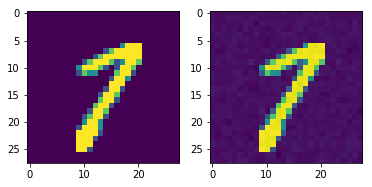

Embedding gaussian watermarks
(Gaussian) Plot class: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
(Gaussian) Plot class: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


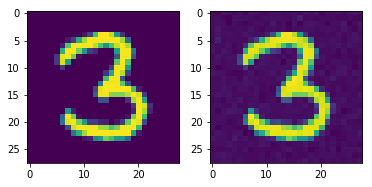

[3/5] Training the original model and embedding the watermark
Instructions for updating:
Use tf.cast instead.
      Skipping embedding of wm and use a cached entry instead
30000/30000 [==============================] - 11s 354us/step
    Done! Original models accuracy on attackers data: 0.9866666666666667
[4/5] Labeling the attackers data with the original model
[5/5] Training the surrogate model
Train on 30000 samples, validate on 10000 samples
Epoch 1/10
30000/30000 [==============================] - 37s 1ms/step - loss: 0.1977 - acc: 0.9415 - val_loss: 0.0631 - val_acc: 0.9795
=> Time: : 36.853736877441406
=> watermark_new_val: 0.08
Confusion matrix, without normalization


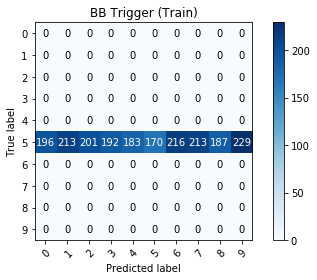

Confusion matrix, without normalization


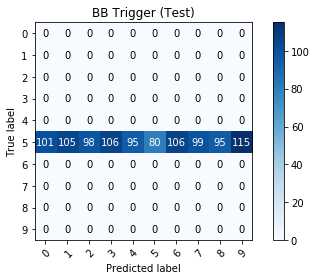

=> watermark_val: 0.085
Epoch 2/10
30000/30000 [==============================] - 36s 1ms/step - loss: 0.0570 - acc: 0.9856 - val_loss: 0.0415 - val_acc: 0.9873
=> Time: : 36.09789443016052
=> watermark_new_val: 0.08
Confusion matrix, without normalization


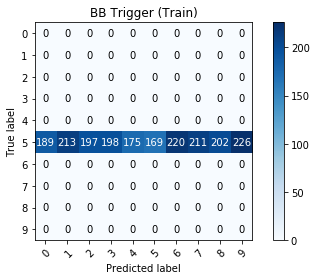

Confusion matrix, without normalization


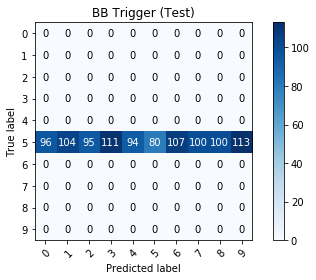

=> watermark_val: 0.0845
Epoch 3/10
30000/30000 [==============================] - 36s 1ms/step - loss: 0.0454 - acc: 0.9899 - val_loss: 0.0455 - val_acc: 0.9852
=> Time: : 36.44922733306885
=> watermark_new_val: 0.081
Confusion matrix, without normalization


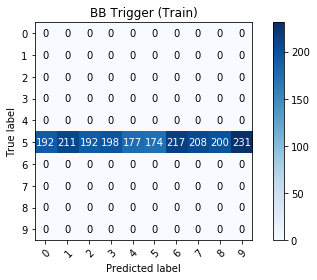

Confusion matrix, without normalization


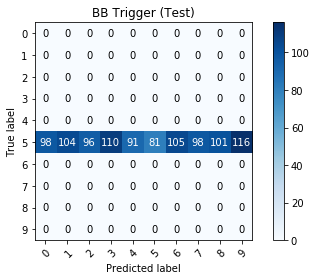

=> watermark_val: 0.087
Epoch 4/10
30000/30000 [==============================] - 36s 1ms/step - loss: 0.0429 - acc: 0.9911 - val_loss: 0.0458 - val_acc: 0.9853
=> Time: : 35.73836803436279
=> watermark_new_val: 0.08
Confusion matrix, without normalization


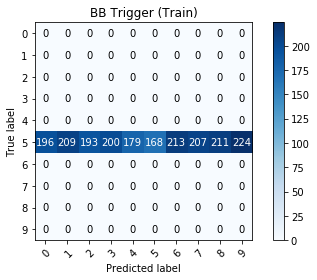

Confusion matrix, without normalization


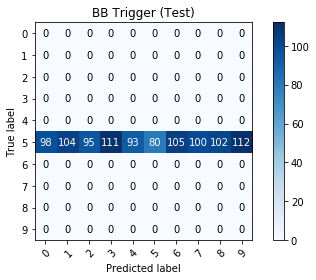

=> watermark_val: 0.084
Epoch 5/10
30000/30000 [==============================] - 38s 1ms/step - loss: 0.0404 - acc: 0.9925 - val_loss: 0.0486 - val_acc: 0.9856
=> Time: : 37.98067021369934
=> watermark_new_val: 0.079
Confusion matrix, without normalization


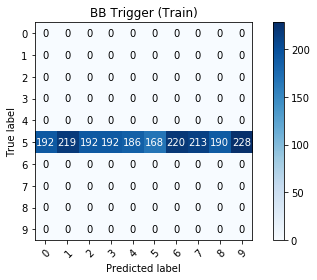

Confusion matrix, without normalization


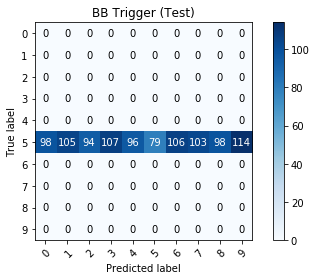

=> watermark_val: 0.084
Epoch 6/10
30000/30000 [==============================] - 37s 1ms/step - loss: 0.0372 - acc: 0.9939 - val_loss: 0.0406 - val_acc: 0.9860
=> Time: : 36.75948429107666
=> watermark_new_val: 0.079
Confusion matrix, without normalization


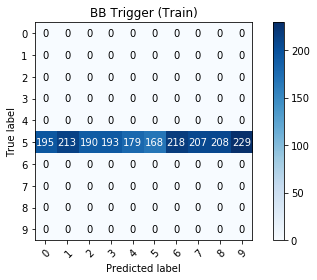

Confusion matrix, without normalization


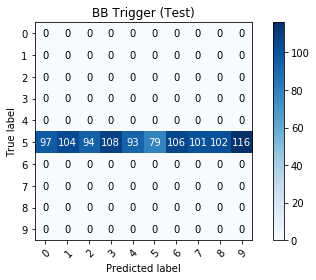

=> watermark_val: 0.084
Epoch 7/10
30000/30000 [==============================] - 26s 865us/step - loss: 0.0368 - acc: 0.9937 - val_loss: 0.0395 - val_acc: 0.9869
=> Time: : 25.94943594932556
=> watermark_new_val: 0.081
Confusion matrix, without normalization


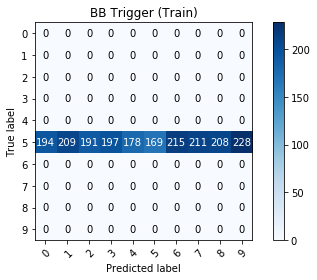

Confusion matrix, without normalization


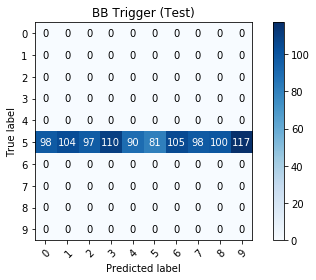

=> watermark_val: 0.0845


In [2]:
surr_model, all_history = asiaccs_blackbox(
     load_dataset_func=load_mnist_images,  # Which dataset to choose. Should return training and testing data
     dataset_label="MNIST",  # Label of the dataset (for caching)
     model=get_lenet_model_for_mnist(),  # Model specification for wm_embedding
     surrogate_model=get_lenet_model_for_mnist(),
     wm_type="gaussian", # logo or gaussian
     owner_data_size=30000,
     total_owner_data_size=30000,
     key_length=2000,
     key_length_test=1000,
     attacker_data_size=30000,
     total_attacker_data_size=30000,
     epochs_embed=10,
     epochs_surr=10,
     batchsize_surr=64,
     cache_embed_wm="asiaccs_gaussian_mnist_30000",
     cache_surr_model=None,
     verbose=True
)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'watermark_new_loss', 'watermark_new_val', 'watermark_loss', 'watermark_val', 'time', 'time_total'])
dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'watermark_new_loss', 'watermark_new_val', 'watermark_loss', 'watermark_val', 'time', 'time_total'])
2.622510818640391
[0.4604150056838989, 0.8910828034083048, 1.3257152795791627, 1.7546728690465292, 2.187244633833567, 2.622510818640391, 3.236739766597748, 3.8383713404337567, 4.445858462651571, 5.041497929890951, 5.674509100119273, 6.2871671716372175, 6.719657770792644]


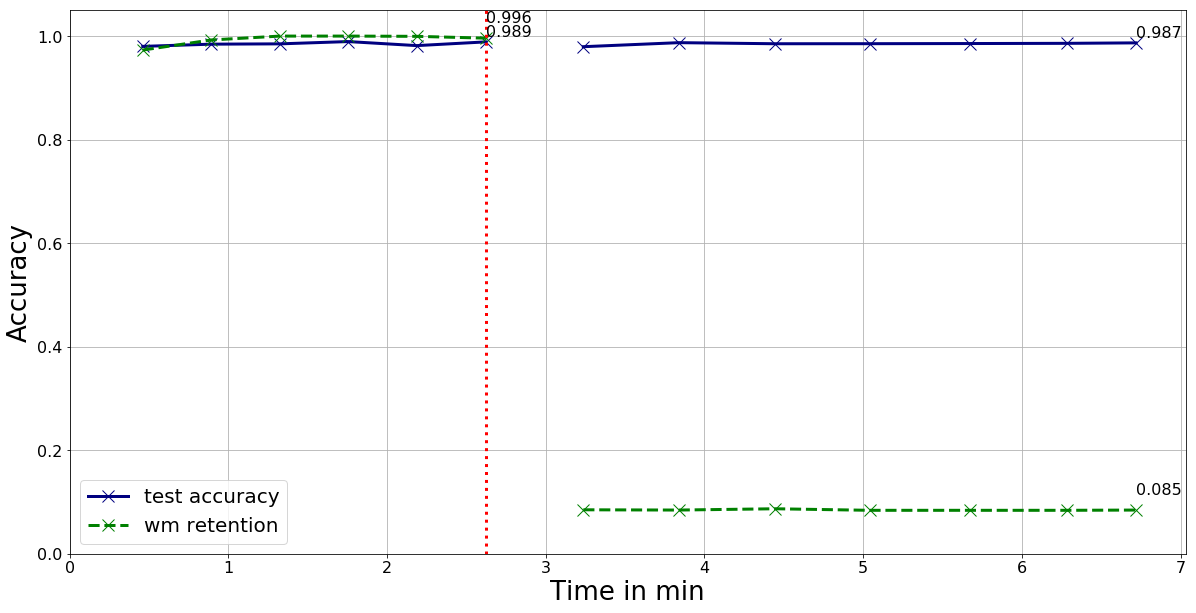

In [3]:
plot_blackbox(all_history)